In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv('D:\\Assignment\\4. Assignment4_Simple linear reg\\delivery_time.csv')

In [3]:
data1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data1.shape

(21, 2)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA 

In [7]:
data1.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
# Count null
data1[data1.isnull().any(axis=1)].shape

(0, 2)

In [9]:
# Duplicate values count

data1.duplicated().sum()

0

In [10]:
# Count Duplicate rows
data1[data1.duplicated()].shape

(0, 2)

In [11]:
new_data = data1.rename(columns = {"Delivery Time":"dt","Sorting Time":"st"})

In [12]:
new_data

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Data visualization

In [13]:
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

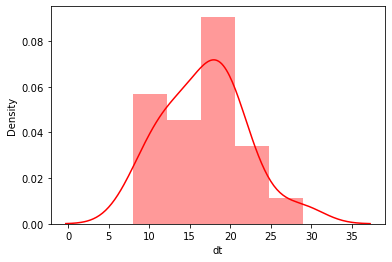

In [15]:
sns.distplot(new_data['dt'], color='red')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

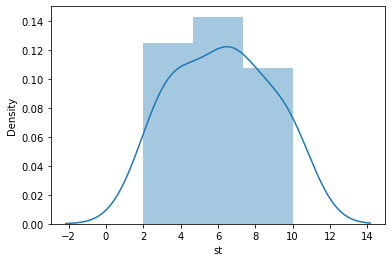

In [16]:
sns.distplot(new_data['st'])

<function matplotlib.pyplot.show(close=None, block=None)>

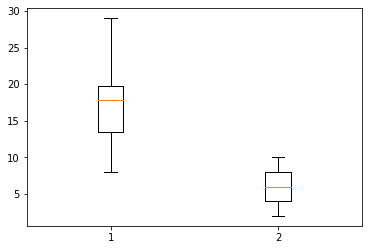

In [17]:
# Box plot
plt.boxplot(new_data)
plt.show

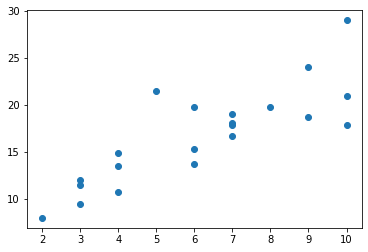

In [18]:
# Scatter plot

plt.scatter(x =new_data['st'] , y=new_data['dt'])
plt.show()

In [20]:
# Correlation (r)

new_data.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


<AxesSubplot:xlabel='st', ylabel='dt'>

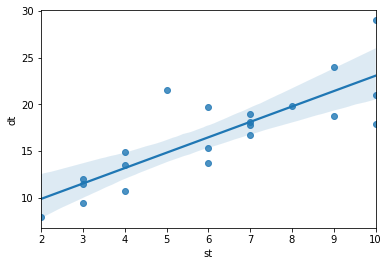

In [21]:
# Regression plot 
# delivery time = dependent veriable
# sorting time = independent veriable

sns.regplot(x =new_data['st'] , y=new_data['dt'])


In [22]:
# Model building
import statsmodels.formula.api as smf


In [23]:
model= smf.ols("dt~st",data =new_data).fit()

In [24]:
# Model testing
# y= mx+c ,to find the value of m and c where m=slope c=intercept
# Finding Coefficient parameters

model.params


Intercept    6.582734
st           1.649020
dtype: float64

In [25]:
# find p and t values
model.tvalues , model.pvalues

(Intercept    3.823349
 st           6.387447
 dtype: float64,
 Intercept    0.001147
 st           0.000004
 dtype: float64)

In [26]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# model prediction


In [27]:
# Y = mx+c 
y = 1.649*(10)+ 6.582

In [28]:
y

23.072000000000003

In [29]:
newdata = pd.Series([10,4])

In [30]:
newdata

0    10
1     4
dtype: int64

In [31]:
data_pred = pd.DataFrame(newdata , columns = ['st'])

In [32]:
data_pred

,st
0,10
1,4


In [33]:
model.predict(data_pred)

0    23.072933
1    13.178814
dtype: float64

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        16:10:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""